Goal of the study: Identify the variables with the highest impact on the final house price

## Exploratory Data Analysis

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)

### Import dataset

In [2]:
df = pd.read_excel('Data/Data_MidTerm_Project_Real_State_Regression.xls')
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Columns type

In [3]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

### Checking NULL values

In [4]:
display(df.isnull().sum())

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

**drop id column**

In [5]:
df = df.drop(['id'], axis=1)
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Checking Columns

In [6]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [51]:
df.loc[df['bedrooms'] == 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [52]:
df = df.drop(15856)

In [7]:
df['bathrooms'].value_counts()
#do we need to round the data?

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [8]:
df['floors'].value_counts()
#confirm the meaning no of floors per properties or location of flat

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [9]:
#df['waterfront'].np.astype= 'category'
df['waterfront'].dtypes

dtype('int64')

In [10]:
#need to clarify the meaning
df['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [11]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [12]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [13]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [14]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [16]:
df['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [17]:
df['sqft_lot15'].value_counts()

5000     427
4000     356
6000     288
7200     210
4800     145
        ... 
10170      1
10573      1
11477      1
1449       1
2007       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [18]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Understanding the difference between sqft_living' and 'sqft_living15.  
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

In [19]:
df_size = df.filter(['sqft_living', 'sqft_above', 'sqft_lot', 'sqft_living15', 'sqft_lot15'])
df_size

,sqft_living,sqft_above,sqft_lot,sqft_living15,sqft_lot15
0,1180,1180,5650,1340,5650
1,2570,2170,7242,1690,7639
2,770,770,10000,2720,8062
3,1960,1050,5000,1360,5000
4,1680,1680,8080,1800,7503
...,...,...,...,...,...
21592,1530,1530,1131,1530,1509
21593,2310,2310,5813,1830,7200
21594,1020,1020,1350,1020,2007
21595,1600,1600,2388,1410,1287


In [20]:
df_size.describe()

,sqft_living,sqft_above,sqft_lot,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,2080.321850,1788.596842,1.509941e+04,1986.620318,12758.283512
std,918.106125,827.759761,4.141264e+04,685.230472,27274.441950
min,370.000000,370.000000,5.200000e+02,399.000000,651.000000
25%,1430.000000,1190.000000,5.040000e+03,1490.000000,5100.000000
50%,1910.000000,1560.000000,7.618000e+03,1840.000000,7620.000000
75%,2550.000000,2210.000000,1.068500e+04,2360.000000,10083.000000
max,13540.000000,9410.000000,1.651359e+06,6210.000000,871200.000000


### Changing columns type into categorical variables

In [53]:
df['waterfront'] = pd.Categorical(df['waterfront'])
df['view'] = pd.Categorical(df['view'])
df['condition'] = pd.Categorical(df['condition'])
df['grade'] = pd.Categorical(df['grade'])
df['bathrooms'] = pd.Categorical(df['bathrooms'])
df['bedrooms'] = pd.Categorical(df['bedrooms'])
df['floors'] = pd.Categorical(df['floors'])
df['yr_renovated'] = pd.Categorical(df['yr_renovated'])
df['yr_built'] = pd.Categorical(df['yr_built'])

In [54]:
df.dtypes

date             datetime64[ns]
bedrooms               category
bathrooms              category
sqft_living               int64
sqft_lot                  int64
floors                 category
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built               category
yr_renovated           category
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [55]:
categorical = df.select_dtypes(include = ['category'])
categorical

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated
0,3,1.00,1.0,0,0,3,7,1955,0
1,3,2.25,2.0,0,0,3,7,1951,1991
2,2,1.00,1.0,0,0,3,6,1933,0
3,4,3.00,1.0,0,0,5,7,1965,0
4,3,2.00,1.0,0,0,3,8,1987,0
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,2009,0
21593,4,2.50,2.0,0,0,3,8,2014,0
21594,2,0.75,2.0,0,0,3,7,2009,0
21595,3,2.50,2.0,0,0,3,8,2004,0


### Ordinal columns

In [62]:
df['bathrooms'].value_counts(ascending=True)

7.5        1
7.75       1
8.0        2
6.75       2
6.5        2
6.25       2
5.75       4
0.5        4
6.0        6
1.25       9
5.5       10
5.25      13
5.0       21
4.75      23
0.75      71
4.25      79
4.5      100
4.0      136
3.75     155
3.25     589
3.5      731
3.0      753
2.75    1185
1.5     1445
2.0     1930
2.25    2047
1.75    3047
1.0     3851
2.5     5377
Name: bathrooms, dtype: int64

In [63]:
categorical_ord = categorical[["waterfront", "view","condition","grade",'bathrooms','bedrooms']]
categories = [["0","1"], ["0", "1", "2","3","4"],["1","2","3","4","5"],
              ["1","2","3","4","5","6","7","8","9","10","11","12","13"], 
              ['0.5','0.75','1.0','1.25','1.5','1.75','2.0','2.25','2.5','2.75','3.0','3.25','3.5','3.75','4.0','4.25','4.5','4.75','5','5.25','5.5','5.75','6.0','6.25','6.5','6.75','7.0','7.5','7.75','8.0'],
             ['1','2','3','4','5','6','7','8','9','10','11']]

In [64]:
ordinal_encoder = OrdinalEncoder(categories=categories)
categorical_ord_encoded = pd.DataFrame(ordinal_encoder.fit_transform(categorical_ord),columns=categorical_ord.columns)

In [65]:
categorical_ord_encoded

,waterfront,view,condition,grade,bathrooms,bedrooms
0,0.0,0.0,2.0,6.0,2.0,2.0
1,0.0,0.0,2.0,6.0,7.0,2.0
2,0.0,0.0,2.0,5.0,2.0,1.0
3,0.0,0.0,4.0,6.0,10.0,3.0
4,0.0,0.0,2.0,7.0,6.0,2.0
...,...,...,...,...,...,...
21591,0.0,0.0,2.0,7.0,8.0,2.0
21592,0.0,0.0,2.0,7.0,8.0,3.0
21593,0.0,0.0,2.0,6.0,1.0,1.0
21594,0.0,0.0,2.0,7.0,8.0,2.0


**Filtering the numerical variables:**

In [66]:
numerical = df.select_dtypes(include = ['int64', 'float'])
numerical

,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,98178,47.5112,-122.257,1340,5650,221900
1,2570,7242,2170,400,98125,47.7210,-122.319,1690,7639,538000
2,770,10000,770,0,98028,47.7379,-122.233,2720,8062,180000
3,1960,5000,1050,910,98136,47.5208,-122.393,1360,5000,604000
4,1680,8080,1680,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,98103,47.6993,-122.346,1530,1509,360000
21593,2310,5813,2310,0,98146,47.5107,-122.362,1830,7200,400000
21594,1020,1350,1020,0,98144,47.5944,-122.299,1020,2007,402101
21595,1600,2388,1600,0,98027,47.5345,-122.069,1410,1287,400000


### Distributions of numeric features

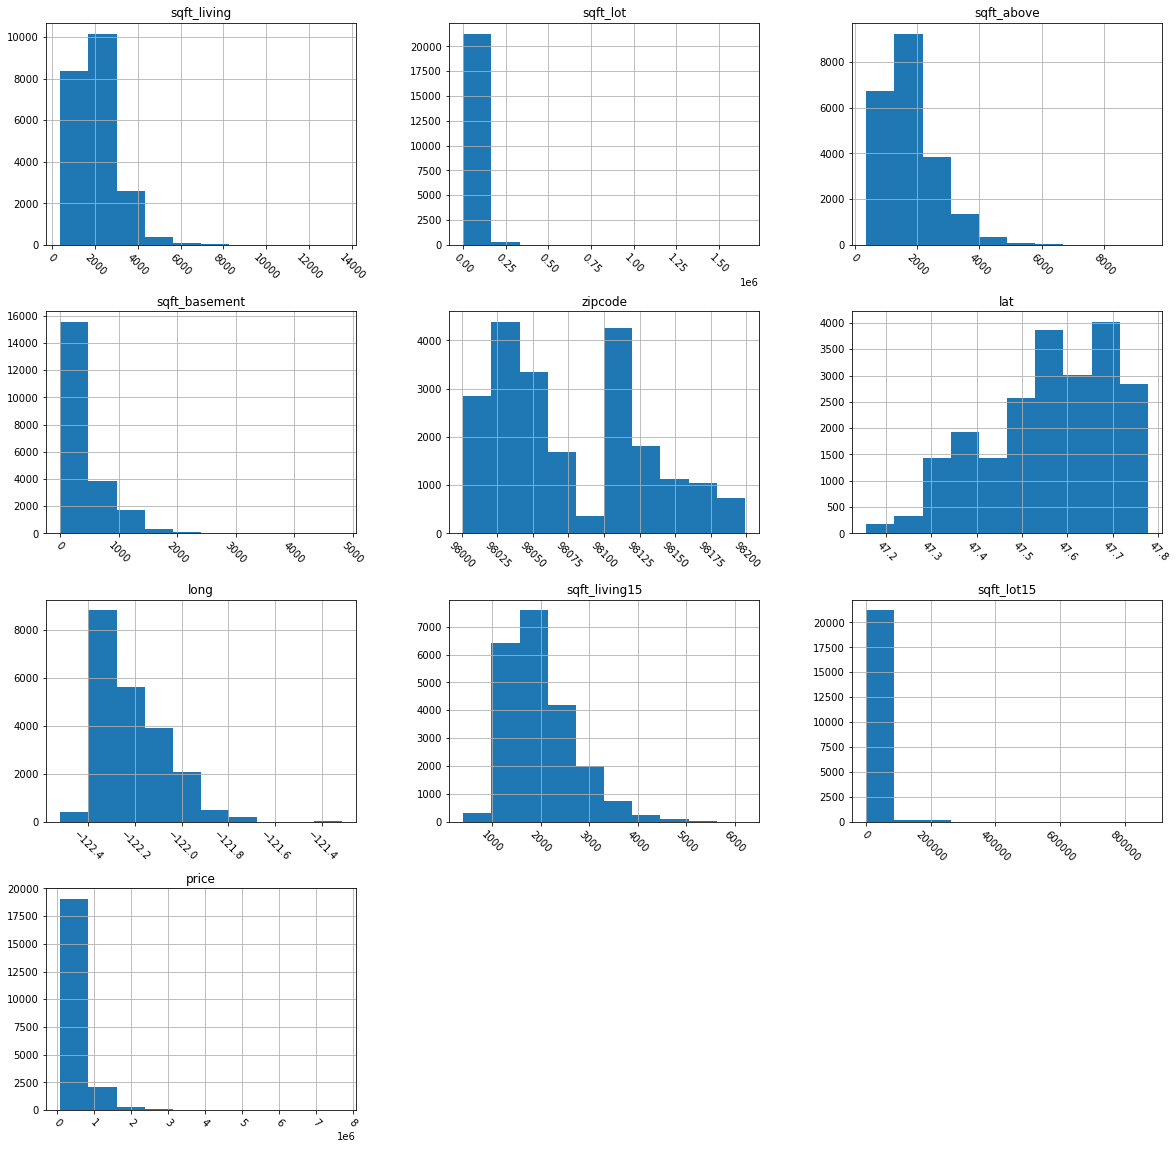

In [67]:
# Plot histogram grid
numerical.hist(figsize=(20,20), xrot=-45)
plt.show()

**Observations**:
- no Null value was detected

### Distribution of categorical variables

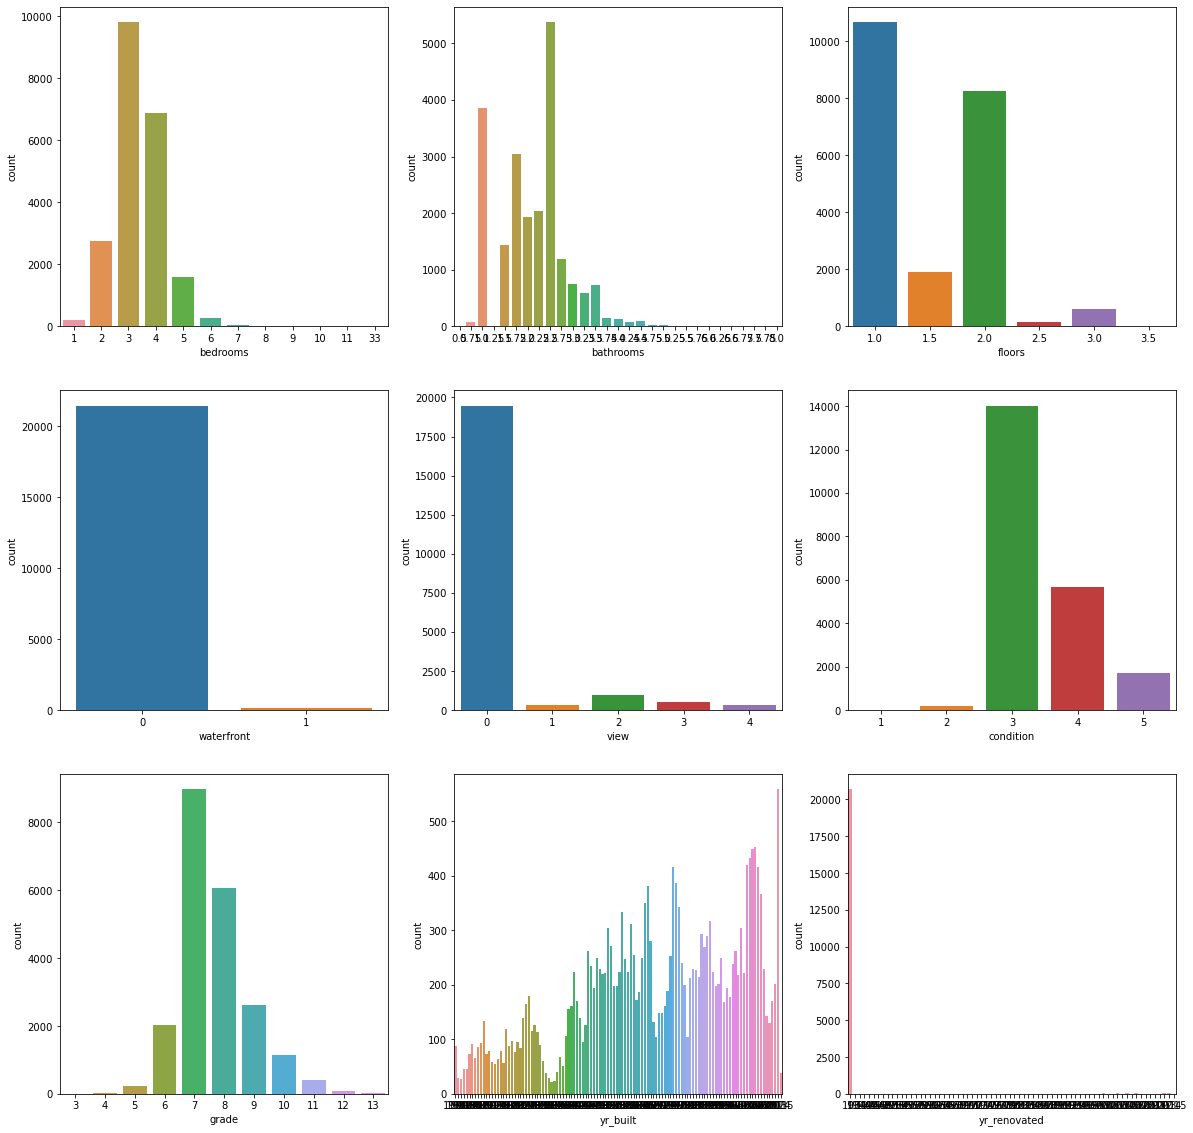

In [70]:
plt.figure(figsize=(20,20))
for i, column in enumerate(categorical,1):
    plt.subplot(3,3,i)
    sns.countplot(categorical[column])

**Observations**
- majority of properties has no view to waterfront
- majority of properties has a very low score in 'view' 
- most of properties has an average condition
- distribution of grade scoring of properties is near to normal

### Correlation of numerical variables (with price)

<AxesSubplot:>

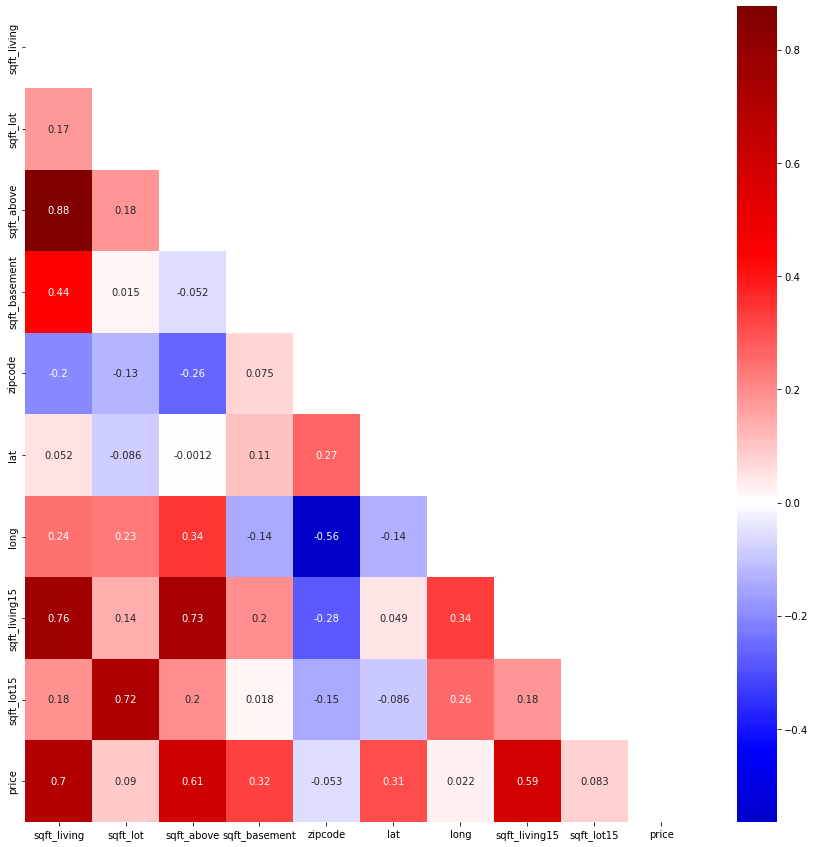

In [71]:
corr = numerical.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask=np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

**Observations**:
- sqft_above > 0.80
- (?) sqft_living15 and sqft_living = 0.76
- (?) sqft_lot and sqft_lot15 = 0.72

### Correlation of numerical variables (no price)

In [72]:
numerical_2 = numerical.iloc[:, :-1]
numerical_2

,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,1180,5650,1180,0,98178,47.5112,-122.257,1340,5650
1,2570,7242,2170,400,98125,47.7210,-122.319,1690,7639
2,770,10000,770,0,98028,47.7379,-122.233,2720,8062
3,1960,5000,1050,910,98136,47.5208,-122.393,1360,5000
4,1680,8080,1680,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,98103,47.6993,-122.346,1530,1509
21593,2310,5813,2310,0,98146,47.5107,-122.362,1830,7200
21594,1020,1350,1020,0,98144,47.5944,-122.299,1020,2007
21595,1600,2388,1600,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:>

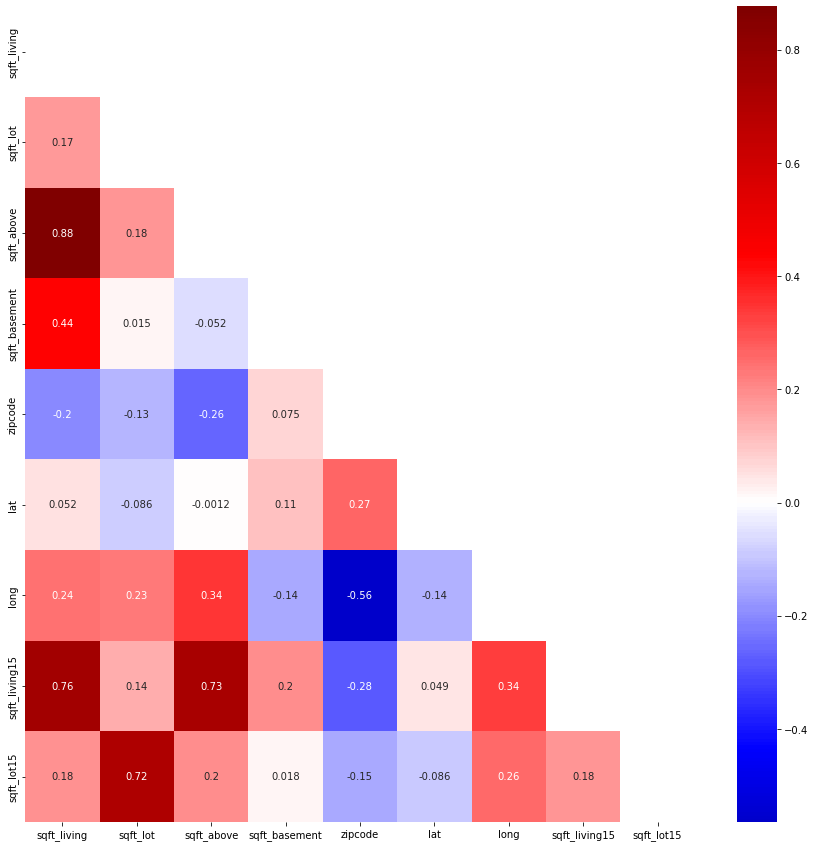

In [43]:
corr_2 = numerical_2.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(numerical_2.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_2,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

### Highly Correlated Columns

In [73]:
corr_matrix = numerical_2.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

['sqft_above']

### Drop the highly correlated variables  

 sqft_above and sqft_living > 0.80

In [74]:
numerical_2.drop(['sqft_above'],axis=1,inplace=True)

In [75]:
numerical_2

,sqft_living,sqft_lot,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,1180,5650,0,98178,47.5112,-122.257,1340,5650
1,2570,7242,400,98125,47.7210,-122.319,1690,7639
2,770,10000,0,98028,47.7379,-122.233,2720,8062
3,1960,5000,910,98136,47.5208,-122.393,1360,5000
4,1680,8080,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...
21592,1530,1131,0,98103,47.6993,-122.346,1530,1509
21593,2310,5813,0,98146,47.5107,-122.362,1830,7200
21594,1020,1350,0,98144,47.5944,-122.299,1020,2007
21595,1600,2388,0,98027,47.5345,-122.069,1410,1287


### Correlation of categorical variables

<AxesSubplot:xlabel='waterfront', ylabel='price'>

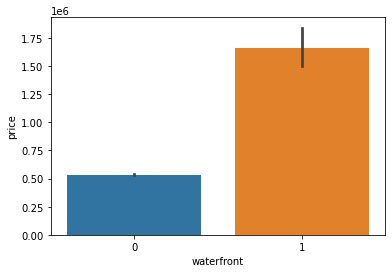

In [76]:
sns.barplot(x = df['waterfront'],y = df['price'])

<AxesSubplot:xlabel='view', ylabel='price'>

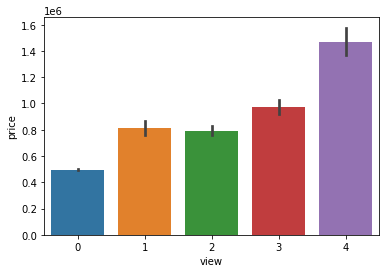

In [77]:
sns.barplot(x = df['view'],y = df['price'])

<AxesSubplot:xlabel='condition', ylabel='price'>

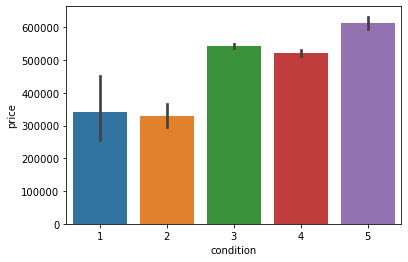

In [78]:
sns.barplot(x = df['condition'],y = df['price'])

<AxesSubplot:xlabel='grade', ylabel='price'>

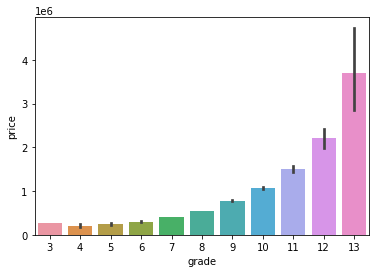

In [79]:
sns.barplot(x = df['grade'],y = df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

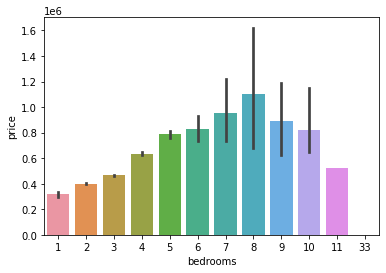

In [80]:
sns.barplot(x = df['bedrooms'],y = df['price'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

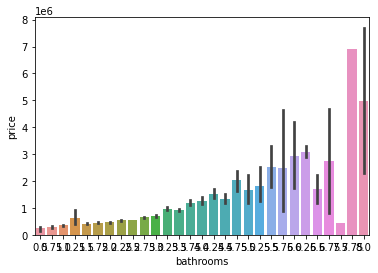

In [81]:
sns.barplot(x = df['bathrooms'],y = df['price'])

<AxesSubplot:xlabel='yr_built', ylabel='price'>

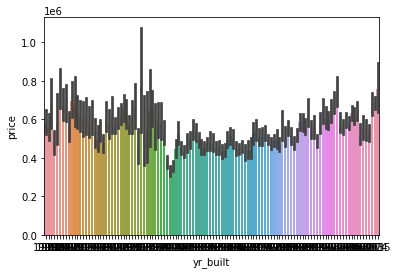

In [82]:
sns.barplot(x = df['yr_built'],y = df['price'])

### Trial 1: only numerical varaibles

#### XY Split

In [85]:
X=numerical_2
X
y=numerical.price
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21596, dtype: int64

In [86]:
X=X._get_numeric_data()
X

,sqft_living,sqft_lot,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,1180,5650,0,98178,47.5112,-122.257,1340,5650
1,2570,7242,400,98125,47.7210,-122.319,1690,7639
2,770,10000,0,98028,47.7379,-122.233,2720,8062
3,1960,5000,910,98136,47.5208,-122.393,1360,5000
4,1680,8080,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...
21592,1530,1131,0,98103,47.6993,-122.346,1530,1509
21593,2310,5813,0,98146,47.5107,-122.362,1830,7200
21594,1020,1350,0,98144,47.5944,-122.299,1020,2007
21595,1600,2388,0,98027,47.5345,-122.069,1410,1287


#### Data Splitting

In [88]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

#### Standardize